## Calculate and Visualize Species Richness Estimates for the US National Parks
Use a National Parks data set with pandas to determine the relative species richness (number of overall species per acre) in the parks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

In [2]:
species_data = pd.read_csv('species.csv', low_memory=False)

In [3]:
species_data.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [4]:
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
dtypes: object(13)
memory usage: 11.8+ MB


In [5]:
species_data.groupby(['Park Name']).count()

,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
Park Name,,,,,,,,,,,,
Acadia National Park,1709,1709,1695,1695,1709,1709,1709,1709,1708,1173,369,75
Arches National Park,1048,1048,1036,1036,1048,1048,1048,1048,1048,737,230,75
Badlands National Park,1389,1389,1366,1365,1389,1389,1389,1129,914,682,236,69
Big Bend National Park,2269,2269,2256,2256,2269,2269,2269,2229,2229,2011,595,138
Biscayne National Park,1726,1726,1721,1720,1726,1726,1726,1613,1613,1331,345,64
Black Canyon of the Gunnison National Park,1106,1106,1106,1106,1106,1106,1106,1106,1106,688,208,66
Bryce Canyon National Park,1286,1286,1267,1267,1286,1286,1286,1286,1286,788,211,73
Canyonlands National Park,1223,1223,1207,1207,1223,1223,1223,1223,1223,864,300,80
Capitol Reef National Park,1566,1566,1545,1545,1566,1566,1566,1566,1566,1162,314,93


In [6]:
# Take group by element (here - considered the index) and create a dataframe with the counts for species ID
all_species_data = species_data.groupby(['Park Name']).count()

In [7]:
species_counts = all_species_data[['Species ID']].copy()

In [8]:
species_counts.head()

,Species ID
Park Name,
Acadia National Park,1709
Arches National Park,1048
Badlands National Park,1389
Big Bend National Park,2269
Biscayne National Park,1726


In [9]:
species_counts = species_counts.rename(columns={'Species ID' : 'Species'})

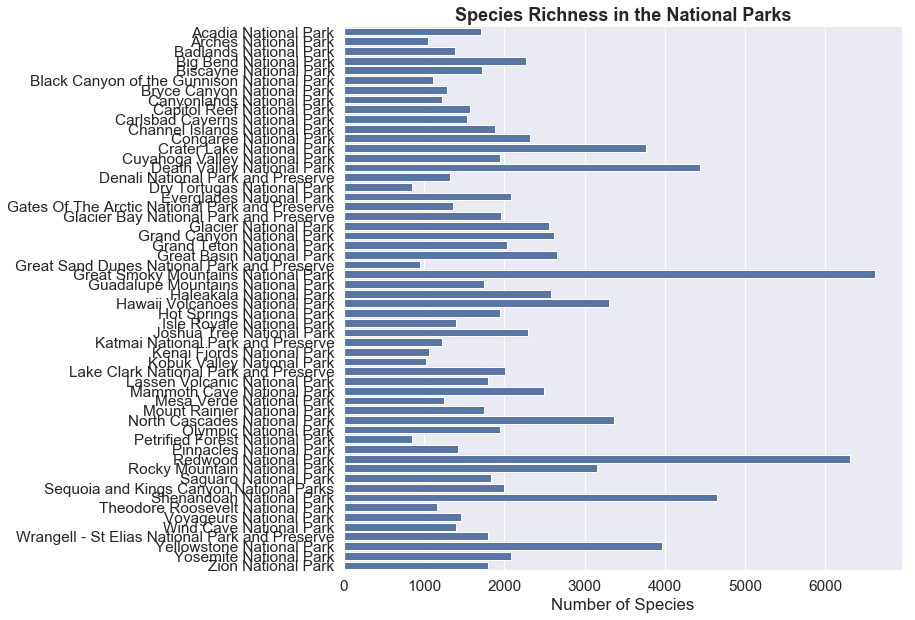

In [11]:
ax = sb.barplot(x = species_counts['Species'],y = species_counts.index, color='b')

sb.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
plt.rcParams['figure.figsize']=(12,10)  
ax.set_xlabel('Number of Species')
ax.set_ylabel('')
ax.set_title('Species Richness in the National Parks', fontsize=18, fontweight='heavy')
sb.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(True)
ax.set_frame_on(True)
#plt.savefig('species_richness_barplot.jpg', bbox_inches="tight")
plt.show()

In [12]:
parks_data = pd.read_csv('parks.csv')

In [13]:
parks_data.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [14]:
# Set the park name as the index to easily merge the two
parks_data = parks_data.set_index('Park Name')

In [15]:
parks_data.head()

,Park Code,State,Acres,Latitude,Longitude
Park Name,,,,,
Acadia National Park,ACAD,ME,47390,44.35,-68.21
Arches National Park,ARCH,UT,76519,38.68,-109.57
Badlands National Park,BADL,SD,242756,43.75,-102.50
Big Bend National Park,BIBE,TX,801163,29.25,-103.25
Biscayne National Park,BISC,FL,172924,25.65,-80.08


In [18]:
richness_data = species_counts.merge(parks_data, left_index=True, right_index=True)

In [19]:
richness_data.head()

,Species,Park Code,State,Acres,Latitude,Longitude
Park Name,,,,,,
Acadia National Park,1709,ACAD,ME,47390,44.35,-68.21
Arches National Park,1048,ARCH,UT,76519,38.68,-109.57
Badlands National Park,1389,BADL,SD,242756,43.75,-102.50
Big Bend National Park,2269,BIBE,TX,801163,29.25,-103.25
Biscayne National Park,1726,BISC,FL,172924,25.65,-80.08


In [20]:
# Proof of Concept for dividing the number of acres by the number of species per park
print(math.floor(richness_data['Acres'][1] / richness_data['Species'][1]))

73


In [21]:
# Create a function to apply to each row in the dataframe
def species_abundance(df):
  return df.apply(
      lambda row:
        math.floor(
          row['Acres'] / row['Species']),
      axis=1
  )

In [22]:
richness_data['Species Abundance'] = species_abundance(richness_data)

In [23]:
richness_data.head()

,Species,Park Code,State,Acres,Latitude,Longitude,Species Abundance
Park Name,,,,,,,
Acadia National Park,1709,ACAD,ME,47390,44.35,-68.21,27
Arches National Park,1048,ARCH,UT,76519,38.68,-109.57,73
Badlands National Park,1389,BADL,SD,242756,43.75,-102.50,174
Big Bend National Park,2269,BIBE,TX,801163,29.25,-103.25,353
Biscayne National Park,1726,BISC,FL,172924,25.65,-80.08,100


In [25]:
print(richness_data['Species Abundance'].mean())

523.2142857142857


In [26]:
richness_data = richness_data.sort_values(['Species Abundance'], ascending=[False])

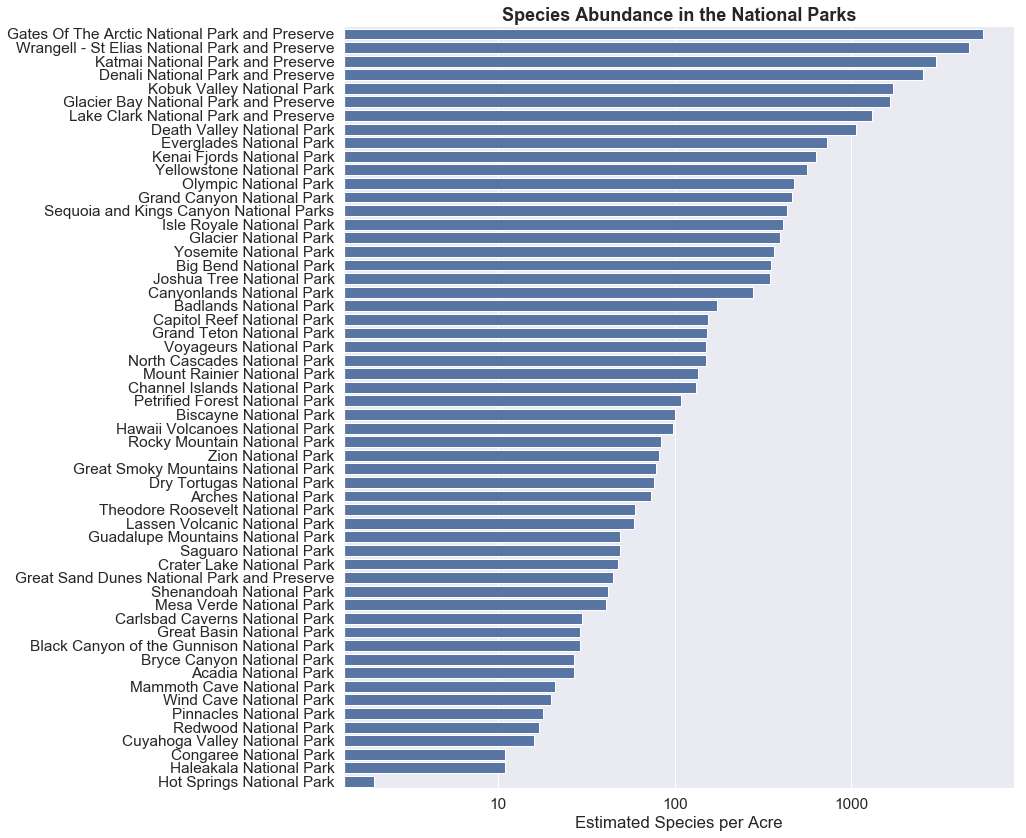

In [29]:
from matplotlib.ticker import ScalarFormatter
ax = sb.barplot(x = richness_data['Species Abundance'],y = richness_data.index, color='b')

sb.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
plt.rcParams['figure.figsize']=(12,14)  
ax.set_xlabel('Estimated Species per Acre')
ax.set_ylabel('')
ax.set_title('Species Abundance in the National Parks', fontsize=18, fontweight='heavy')
sb.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(True)
ax.set_frame_on(True)
ax.set(xscale="log")
for axis in [ax.xaxis]:
    axis.set_major_formatter(ScalarFormatter())
#plt.savefig('species_abundance_barplot.jpg', bbox_inches="tight")

plt.show()